In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
model_df=pd.read_csv('./home_credit_data/model_df.csv')

In [3]:
y=model_df['TARGET']
X=model_df[['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','bureau_DAYS_CREDIT_mean', 'CREDIT_ACTIVE_Closed_count_norm','CREDIT_ACTIVE_Active_count_norm','DAYS_BIRTH','DAYS_BIRTH_GROUP','bureau_DAYS_CREDIT_min','bureau_DAYS_CREDIT_UPDATE_mean','DAYS_EMPLOYED','CREDIT_ACTIVE_Active_count','OWN_CAR_AGE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','BASEMENTAREA_MEDI','LIVINGAREA_AVG','bureau_DAYS_ENDDATE_FACT_min','bureau_DAYS_ENDDATE_FACT_sum','BASEMENTAREA_AVG','bureau_DAYS_CREDIT_ENDDATE_sum','LIVINGAREA_MEDI','BASEMENTAREA_MODE','bureau_DAYS_CREDIT_max','TOTALAREA_MODE','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','LIVINGAREA_MODE','bureau_DAYS_CREDIT_sum','APARTMENTS_AVG','bureau_DAYS_CREDIT_UPDATE_sum','APARTMENTS_MODE','bureau_DAYS_ENDDATE_FACT_mean','APARTMENTS_MEDI','CREDIT_TYPE_Microloan_count_norm','bureau_DAYS_CREDIT_ENDDATE_mean','REG_CITY_NOT_WORK_CITY','bureau_DAYS_CREDIT_UPDATE_min','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','bureau_DAYS_CREDIT_ENDDATE_min','FLOORSMAX_AVG','CREDIT_TYPE_Credit card_count_norm','AMT_CREDIT','FLOORSMAX_MEDI','CREDIT_TYPE_Credit card_count','ELEVATORS_AVG','FLOORSMAX_MODE']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [5]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
 def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Taç Yaprak Uzunluğu')
    plt.ylabel('Taç Yaprak Genişliği')
    plt.xlim(xx.min(), xx.max())
    plt.title(title, color='darkred')
    return plt

TypeError: '(slice(None, None, None), 0)' is an invalid key

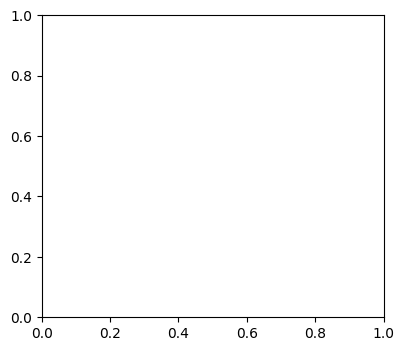

In [8]:
kernel_list = ['linear', 'rbf', 'poly']

plt.figure(figsize=(15,4), dpi=100)
for i, kernel in enumerate(kernel_list):
    svc = SVC(kernel=kernel).fit(X, y)
    plt.subplot(1,3,i+1)
    plotSVC('kernel=' + str(kernel))
plt.show()